In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #Our hero ^_^


In [120]:
class Cleaner:
    def __init__(self, file_name):
        self.file_name = file_name
        self.data_frame = None
        self.stat = {}
        self.temp_data_frame = self.data_frame
        
    def load_data(self,delimiter=None):
        if not self.file_name:
            return "File Name Required"
        if not delimiter:
            self.data_frame = pd.read_csv(self.file_name)
        else:
            self.data_frame = pd.read_csv(self.file_name, sep=delimiter)

    def describe_data(self):
        unique_values = self.data_frame.nunique()
        total_rows = self.data_frame.shape[0]
        
        self.stat = {
            "Column_Name" : self.data_frame.columns.values,
            "Unique_Values" : [],
            "Data_Types": [],
            "NULL_and_NaN_values_Count": []
        }
        
        for col in data["Column_Name"]:
            self.stat["NULL_and_NaN_values_Count"].append(self.data_frame[col].isna().sum())
            self.stat["Unique_Values"].append(unique_values[col])
            self.stat["Data_Types"].append(self.data_frame.dtypes[col])

        uninque_vals_analysis = pd.DataFrame(self.stat)
        return uninque_vals_analysis

    def clean_data(self,impute = True, strategy= "mean",missing_values=np.nan,columns=None,category_columns = None,drop="",convert_category_cols=None):
        """
        It appies simple techniques for cleaning a dataset, which is 
        in the form of pandas DataFrame. It also supports optional arguemtns
        for cleaning the dataset.

        Parameters
        ----------
        strategy: str, default ``mean``, optional
            Strategy used for imputing SimpleImputer 
            .. Help to fill out NaN values in a data set with some math operation (Mean by default)
        """
        
        self.temp_data_frame = self.data_frame.copy()
        
        if drop.lower() == "row":
            self.temp_data_frame.dropna(inplace=True)
        elif drop.lower() == "col":
            self.tmep_data_frame.dropna(axis=1,inplace=True)
            
        if convert_category_cols:
            for col in category_columns:
                self.temp_data_frame[col].fillna(self.temp_data_frame[col].value_counts().index[0],inplace=True)

            temp_data_frames = []
            for col in category_columns:
                new_data = pd.get_dummies(self.temp_data_frame[col])
                temp_data_frames.append(new_data)
            self.temp_data_frame = self.temp_data_frame.drop(columns=category_columns,axis=1)
            temp_data_frames.append(self.temp_data_frame)
            self.temp_data_frame = pd.concat(temp_data_frames)
            
        if not columns:
            columns = self.temp_data_frame.columns.values
            
        if len(category_columns) != 0 and not convert_category_cols:
            for col in category_columns:
                columns = columns[columns != col]

        if impute:
            if len(category_columns) != 0 and not convert_category_cols:
                self.temp_data_frame.drop(category_columns,axis=1,inplace=True)
            self.temp_data_frame.replace('?',np.NaN,inplace=True)
            imp=SimpleImputer(missing_values=np.NaN)
            idf=pd.DataFrame(imp.fit_transform(self.temp_data_frame))
            idf.columns=self.temp_data_frame.columns
            idf.index=self.temp_data_frame.index
            self.temp_data_frame = idf        
        return self.temp_data_frame
    
    def visualize(self):
        msno.matrix(self.data_frame,)
            
    def update(self):
        self.data_frame = self.temp_data_frame


In [121]:
cl = Cleaner("data-sets/test.csv")
cl.load_data()

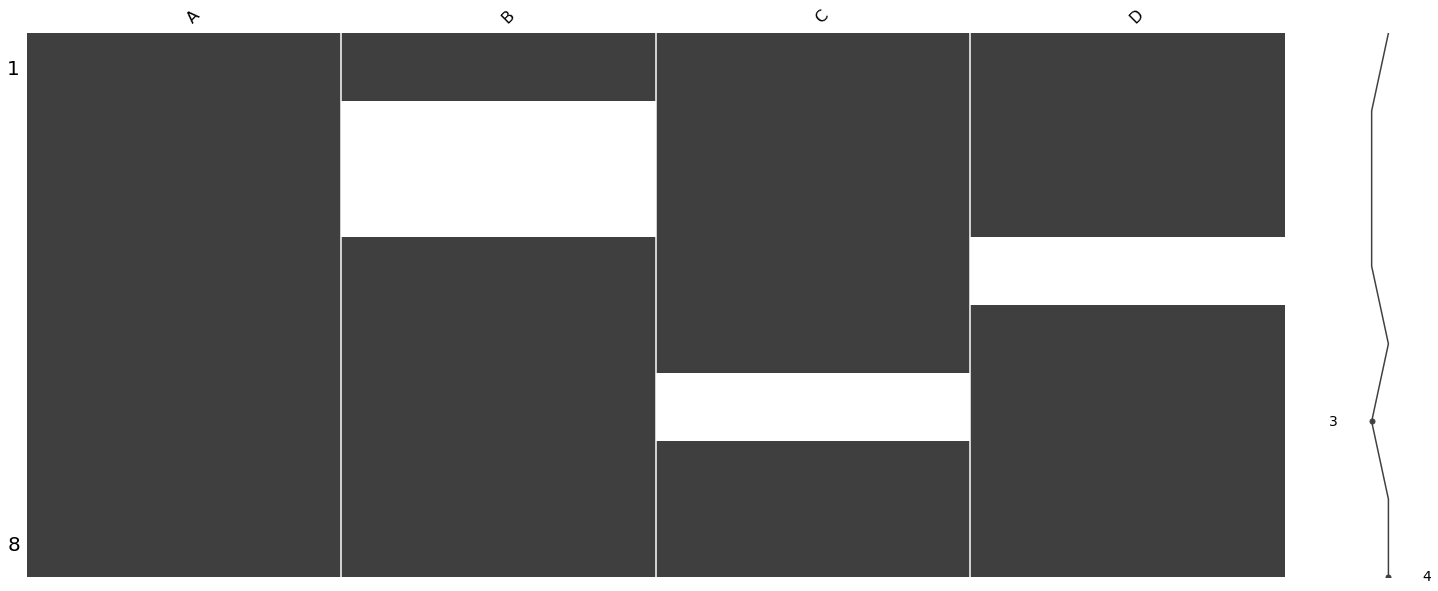

In [122]:
cl.describe_data()
# display(cl.clean_data(category_columns=["D"],convert_category_cols=True))
# cl.update()
# cl.describe_data()
cl.visualize()


In [57]:
cl.data_frame.isna().sum()
cl.data_frame.drop("D",axis=1)

,A,B,C
0,1,2.0,3.0
1,4,NaN,6.0
2,7,NaN,9.0
3,10,11.0,12.0
4,13,14.0,15.0
5,16,17.0,NaN
6,19,12.0,12.0
7,20,11.0,23.0
